---
CSC 268 Lab 11:  Haar Wavelet Transform
---

In this lab we will test out the 2D Haar wavelet transform.  The implementation given below is optimized for teaching purposes rather than speed.  It includes an option to perform the transform only partway, so that we can see some of the steps in the process.

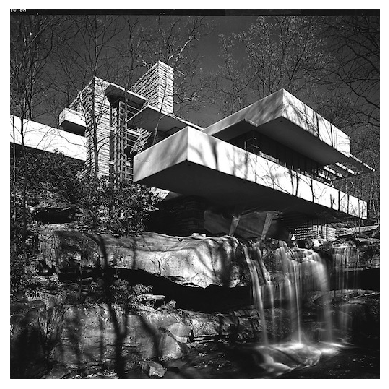

In [1]:
import cv2 as cv
import numpy as np
from scipy.fft import fft, ifft, fft2, ifft2, fftn, ifftn
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='gray')

def imshow(img,cmap=None):
    plt.imshow(img,cmap=cmap,interpolation='none')
    plt.axis('off')
    plt.show()
    
fw = cv.imread('falling.jpg',0)[:512,50:562].astype(np.float32)/255.0
imshow(fw)

Each stage of the forward transform splits the image into four quarters:  a lower resolution version of the image in the upper left, horizontal and vertical edges in the upper right and lower left, respectively, and diagonal corners in the lower right.  The process is the repeated at the next layer just for the upper left corner.  With our option to set the depth, we can visualize various levels of the transform.  Note that the lower and right portions of the image aren't changing at all as we go down in depth.  However, the maximum value in the upper left quadrant tends to get larger and larger, and our image display function automatically scales the intensities accordingly.

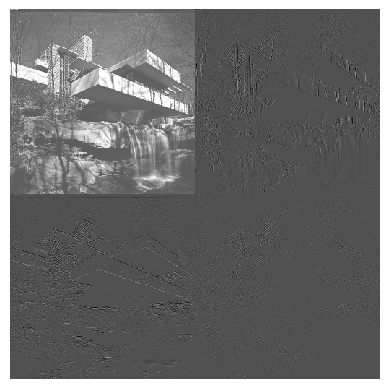

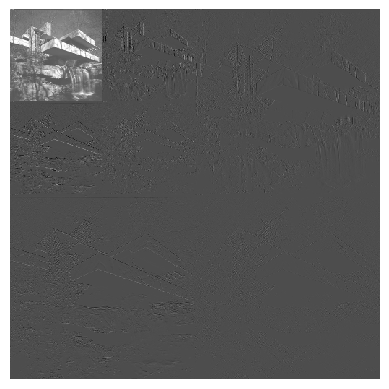

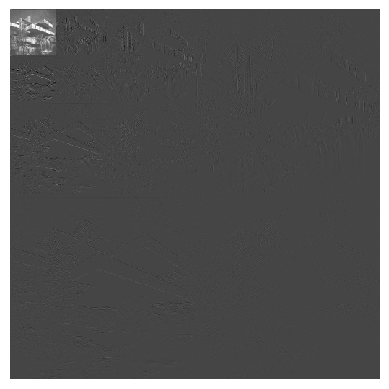

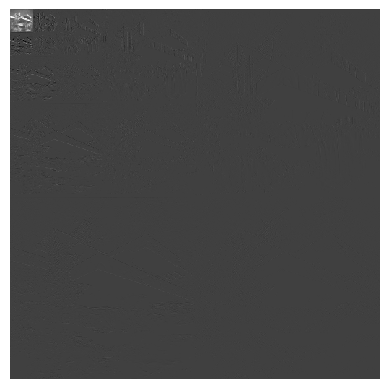

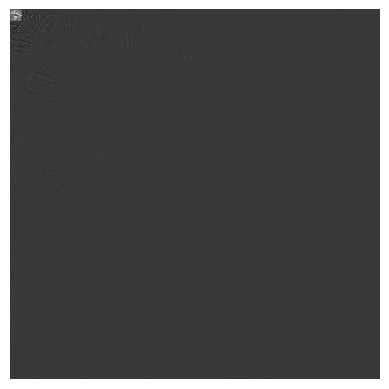

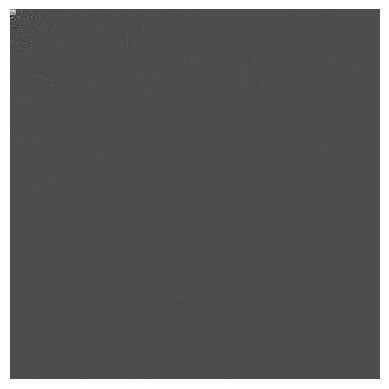

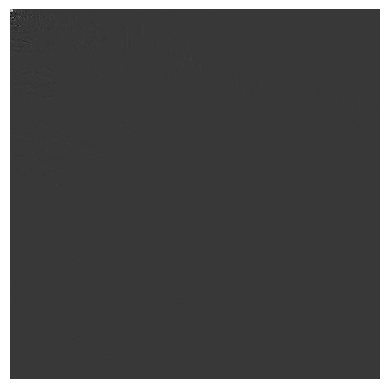

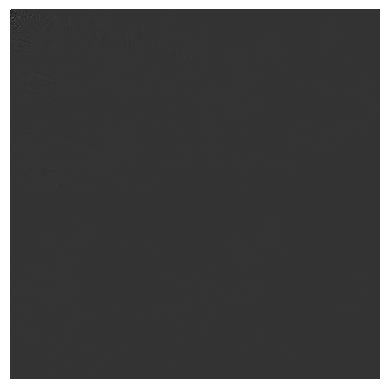

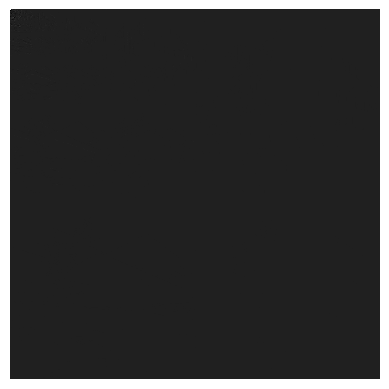

In [5]:
def haar2d(im,depth=0):
    '''2D Haar wavelet transform with optional depth'''
    nrow,ncol = im.shape
    hnrow,hncol = nrow/2,ncol/2
    tmp = np.zeros(im.shape)
    for i in range(nrow//2):
        for j in range(ncol):
            tmp[i,j] = im[2*i,j]+im[2*i+1,j]
            tmp[i+nrow//2,j] = im[2*i,j]-im[2*i+1,j]
    out = np.zeros(im.shape)
    for i in range(nrow):
        for j in range(ncol//2):
            out[i,j] = tmp[i,2*j]+tmp[i,2*j+1]
            out[i,j+ncol//2] = tmp[i,2*j]-tmp[i,2*j+1]
    out = out/2
    if depth-1 != 0 and nrow>2:
        out[:nrow//2,:ncol//2] = haar2d(out[:nrow//2,:ncol//2],depth-1)
    return out

hfw1 = haar2d(fw,1)
imshow(hfw1)
hfw2 = haar2d(fw,2)
imshow(hfw2)
hfw1 = haar2d(fw,3)
imshow(hfw1)
hfw2 = haar2d(fw,4)
imshow(hfw2)
hfw1 = haar2d(fw,5)
imshow(hfw1)
hfw2 = haar2d(fw,6)
imshow(hfw2)
hfw1 = haar2d(fw,7)
imshow(hfw1)
hfw2 = haar2d(fw,8)
imshow(hfw2)
hfw0 = haar2d(fw)
imshow(hfw0)

# TODO: show levels 3-8

The inverse Haar transform simply undoes what the Haar transform did, in reverse order.  It must begin at the smallest upper left quadrant and reverse successively larger squares until the entire image is restored.  Since the forward transform worked with pairs and stored the results in the first and second half of the row or column, the reverse must work with numbers from the first and second half, and store them in consecutive pairs.  Note that it doesn't matter to the final result whether we do rows or columns first, nor when we do the scaling.

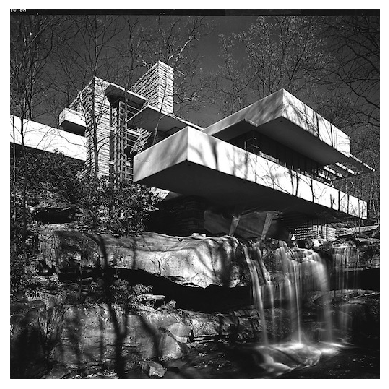

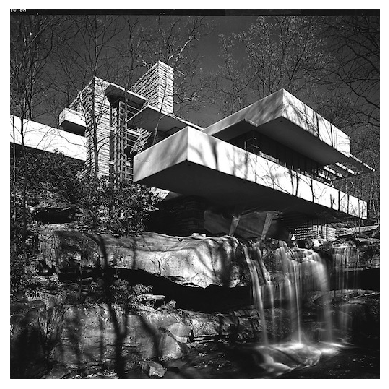

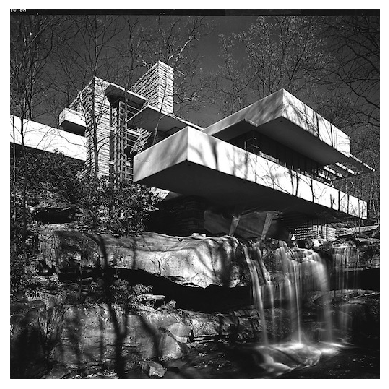

In [3]:
def ihaar2d(hwt,depth=0):
    '''2D inverse Haar wavelet transform with optional depth'''
    nrow,ncol = hwt.shape
    tmp1 = hwt.copy()
    if depth-1 != 0 and nrow>2:
        tmp1[:nrow//2,:ncol//2] = ihaar2d(tmp1[:nrow//2,:ncol//2],depth-1)
    hnrow,hncol = nrow/2,ncol/2
    tmp2 = np.zeros(hwt.shape)
    for i in range(nrow//2):
        for j in range(ncol):
            tmp2[2*i,j] = tmp1[i,j]+tmp1[i+nrow//2,j]
            tmp2[2*i+1,j] = tmp1[i,j]-tmp1[i+nrow//2,j]
    out = np.zeros(hwt.shape)
    for i in range(nrow):
        for j in range(ncol//2):
            out[i,2*j] = tmp2[i,j]+tmp2[i,j+nrow//2]
            out[i,2*j+1] = tmp2[i,j]-tmp2[i,j+nrow//2]
    out = out/2
    return out

ihfw1 = ihaar2d(haar2d(fw,1),1)
imshow(ihfw1)
ihfw2 = ihaar2d(haar2d(fw,2),2)
imshow(ihfw2)
ihfw = ihaar2d(haar2d(fw))
imshow(ihfw)

Like the Fourier transform, the Haar wavelet transform also separates image components by frequency.  We can do high and low pass filtering in Haar wavelet space.

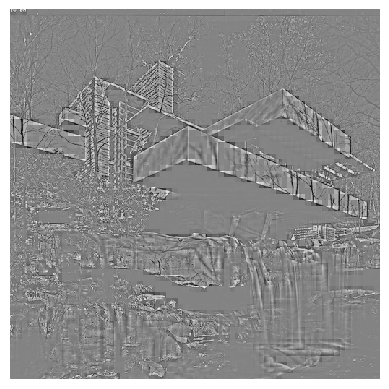

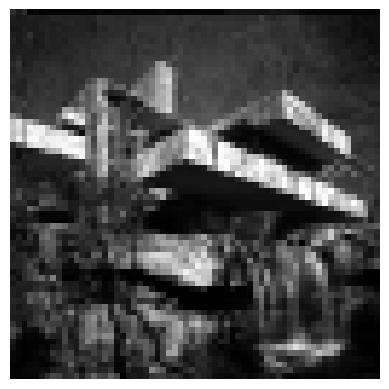

In [4]:
# TODO: Execute the Haar transform.  
# Zero out the 64x64 upper left quadrant.
# Untransform the resulting image to get a "high-pass" result
# Repeat, this time zeroing the other parts of the image to get a "low-pass" result
hwt = haar2d(fw)
hwt[:64,:64] = 0
imshow(ihaar2d(hwt))
hwt = haar2d(fw)
hwt[64:,:] = 0
hwt[:,64:] = 0
imshow(ihaar2d(hwt))

#### Sources

[https://people.math.sc.edu/Burkardt/py_src/haar/haar.html](https://people.math.sc.edu/Burkardt/py_src/haar/haar.html)

Photo:  [Bill Hedrich](https://designobserver.com/feature/the-master/38921)